In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load Dataset

In [2]:
data = pd.read_csv("IO 2010 Sulawesi Selatan.csv")
data.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,302,303,304,305,309,310,409,509,600,700
0,Padi,1,860269.596200,0.000000,0.000000,10359.337980,0.000000,0.000000,0.0,0.000000,...,0.0,0.0000,0.000000,0.000000e+00,0.000000e+00,1.124889e+07,0.0,0.0,1.124889e+07,1.124889e+07
1,Tanaman bahan makanan lainnya,2,0.000000,582084.149900,0.000000,182189.380600,0.000000,2456.429353,0.0,0.000000,...,0.0,0.0000,27830.707960,8.878554e+05,5.390295e+06,7.288266e+06,0.0,0.0,7.288266e+06,7.288266e+06
2,Tanaman perkebunan,3,0.901156,3531.156853,644018.173500,49761.165470,0.000000,0.000000,0.0,0.000000,...,0.0,0.0000,3412.477837,4.821600e+06,5.352460e+06,9.183128e+06,0.0,0.0,9.183128e+06,9.183128e+06
3,Peternakan dan hasil-hasilnya,4,100432.730100,204951.991000,40607.181690,85817.333650,0.000000,330.516666,0.0,0.000000,...,0.0,135804.8442,8884.349717,1.654981e+05,1.129234e+06,2.166391e+06,0.0,0.0,2.166391e+06,2.166391e+06
4,Kehutanan,5,55.120636,372.029473,971.848231,48.555593,137.652127,1281.859853,0.0,33.713091,...,0.0,0.0000,905.531144,3.540820e+04,7.836585e+04,1.529393e+05,0.0,0.0,1.529393e+05,1.529393e+05


In [3]:
data.tail()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,302,303,304,305,309,310,409,509,600,700
39,Penyusutan,203,1.452299e+05,2.587877e+04,1.147662e+05,2.883109e+04,5119.723838,2.872259e+05,10511.751150,8.300689e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Pajak Tak Langsung,204,6.937260e+04,5.641550e+04,3.815486e+04,1.665497e+04,1064.637014,6.872361e+04,2272.474521,3.013393e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Subsidi,205,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Nilai Tambah Bruto,209,8.658558e+06,6.108251e+06,6.305311e+06,1.541825e+06,122502.675300,7.705983e+06,218219.567500,6.901461e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Jumlah Input,210,1.124889e+07,7.288266e+06,9.183128e+06,2.166391e+06,152939.335200,8.630996e+06,341949.506400,1.032085e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.rename( columns={'Unnamed: 0':'Sektor', 'Unnamed: 1':'Kode'}, inplace=True )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 49 columns):
Sektor    44 non-null object
Kode      44 non-null int64
1         44 non-null float64
2         44 non-null float64
3         44 non-null float64
4         44 non-null float64
5         44 non-null float64
6         44 non-null float64
7         44 non-null float64
8         44 non-null float64
9         44 non-null int64
10        44 non-null float64
11        44 non-null float64
12        44 non-null float64
13        44 non-null float64
14        44 non-null float64
15        44 non-null float64
16        44 non-null float64
17        44 non-null float64
18        44 non-null float64
19        44 non-null float64
20        44 non-null float64
21        44 non-null float64
22        44 non-null float64
23        44 non-null float64
24        44 non-null float64
25        44 non-null float64
26        44 non-null float64
27        44 non-null float64
28        44 non-null float64
29

## Matrix A

In [5]:
a = data.iloc[:35, :37]
del a["Sektor"] , a["Kode"]
a.tail()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
30,3743.743622,12615.745520,19866.223940,4997.007998,520.528403,12308.320550,3034.314396,402704.377700,0,5178.198506,...,105917.39100,138251.392700,34613.14768,2326.477078,2810.614248,334696.754300,72981.91809,4.066154e+04,4.254848e+05,2893.575190
31,1185.584115,5772.949342,4722.638898,1515.836749,215.115812,5152.120281,263.303981,12983.477990,0,1704.741704,...,50763.07169,242383.421600,16207.09331,70074.130360,44552.119400,87720.902270,273359.20490,4.605670e+04,1.214648e+06,3722.121816
32,173531.401300,65510.072460,231213.093300,9226.947703,7973.510287,96451.519420,86609.491590,79132.710210,0,315.907155,...,350474.01410,791182.442200,9624.00534,186209.002000,17643.794460,77181.600910,70381.48052,1.025157e+06,2.720107e+05,39668.729670
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.560871e-01,0.000000e+00,0.000000
34,2015.786614,1896.493266,7867.852625,847.263499,730.432787,650.642870,562.535946,2966.602608,0,33.977372,...,13833.95433,9494.223231,851.43087,125043.301700,434.577375,3013.151661,15069.10638,1.965451e+04,2.954665e+04,12663.464620


In [6]:
aa = data.iloc[:35, :]
del aa["Sektor"] , aa["Kode"]
jumlah = pd.DataFrame(aa["310"])
jumlah.head()

,310
0,1.124889e+07
1,7.288266e+06
2,9.183128e+06
3,2.166391e+06
4,1.529393e+05


In [23]:
aa = np.array(a).T
bb = np.array(jumlah).T
aa , bb

(array([[8.60269596e+05, 0.00000000e+00, 9.01156375e-01, ...,
         1.73531401e+05, 0.00000000e+00, 2.01578661e+03],
        [0.00000000e+00, 5.82084150e+05, 3.53115685e+03, ...,
         6.55100725e+04, 0.00000000e+00, 1.89649327e+03],
        [0.00000000e+00, 0.00000000e+00, 6.44018174e+05, ...,
         2.31213093e+05, 0.00000000e+00, 7.86785263e+03],
        ...,
        [3.99480628e+02, 2.70570670e+03, 2.47815250e+01, ...,
         1.02515650e+06, 1.56087110e-01, 1.96545126e+04],
        [1.87270591e+02, 1.04214573e+05, 6.73316928e+03, ...,
         2.72010730e+05, 0.00000000e+00, 2.95466451e+04],
        [9.11954677e+00, 1.49737588e+04, 2.76412648e+03, ...,
         3.96687297e+04, 0.00000000e+00, 1.26634646e+04]]),
 array([[1.12488915e+07, 7.28826563e+06, 9.18312786e+06, 2.16639121e+06,
         1.52939335e+05, 8.63099563e+06, 3.41949506e+05, 1.03208465e+07,
         0.00000000e+00, 6.63934812e+05, 4.19455999e+06, 2.61105087e+07,
         2.97457171e+05, 1.11495822e+05, 2.750

In [24]:
matrix_a = np.divide(aa,bb, out=np.zeros_like(aa), where=bb!=0)
matrix_a 

array([[7.64759438e-02, 0.00000000e+00, 9.81317465e-08, ...,
        1.81420294e-02, 0.00000000e+00, 1.95229158e-03],
       [0.00000000e+00, 7.98659351e-02, 3.84526591e-04, ...,
        6.84882191e-03, 0.00000000e+00, 1.83675584e-03],
       [0.00000000e+00, 0.00000000e+00, 7.01305899e-02, ...,
        2.41724248e-02, 0.00000000e+00, 7.62002402e-03],
       ...,
       [3.55128883e-05, 3.71241505e-04, 2.69859304e-06, ...,
        1.07176104e-01, 4.78393609e-09, 1.90354173e-02],
       [1.66479151e-05, 1.42989537e-02, 7.33210882e-04, ...,
        2.84376581e-02, 0.00000000e+00, 2.86159587e-02],
       [8.10706260e-07, 2.05450234e-03, 3.01000544e-04, ...,
        4.14721057e-03, 0.00000000e+00, 1.22645796e-02]])

In [25]:
# Make identity matrix
identitas = np.identity(35, dtype = None)
identitas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
i_a = np.subtract(identitas,matrix_a)
i_a

array([[ 9.23524056e-01,  0.00000000e+00, -9.81317465e-08, ...,
        -1.81420294e-02,  0.00000000e+00, -1.95229158e-03],
       [ 0.00000000e+00,  9.20134065e-01, -3.84526591e-04, ...,
        -6.84882191e-03,  0.00000000e+00, -1.83675584e-03],
       [ 0.00000000e+00,  0.00000000e+00,  9.29869410e-01, ...,
        -2.41724248e-02,  0.00000000e+00, -7.62002402e-03],
       ...,
       [-3.55128883e-05, -3.71241505e-04, -2.69859304e-06, ...,
         8.92823896e-01, -4.78393609e-09, -1.90354173e-02],
       [-1.66479151e-05, -1.42989537e-02, -7.33210882e-04, ...,
        -2.84376581e-02,  1.00000000e+00, -2.86159587e-02],
       [-8.10706260e-07, -2.05450234e-03, -3.01000544e-04, ...,
        -4.14721057e-03,  0.00000000e+00,  9.87735420e-01]])

In [27]:
BL = np.linalg.inv(i_a)
BL

array([[1.08306502e+00, 1.48784928e-03, 4.29114817e-04, ...,
        2.27013244e-02, 1.08601685e-10, 3.36134432e-03],
       [7.00754013e-04, 1.08992357e+00, 1.39766054e-03, ...,
        9.94017082e-03, 4.75531419e-11, 3.63927361e-03],
       [8.04659762e-04, 8.72778809e-04, 1.07592503e+00, ...,
        3.08171355e-02, 1.47427207e-10, 1.14941213e-02],
       ...,
       [1.08678281e-03, 1.15969054e-03, 5.31553465e-04, ...,
        1.12377997e+00, 5.37609154e-09, 2.44812276e-02],
       [2.13012031e-02, 2.33955183e-02, 9.85608131e-03, ...,
        5.16542159e-02, 1.00000000e+00, 5.62777908e-02],
       [2.07647602e-03, 2.71322414e-03, 1.20135273e-03, ...,
        5.42155644e-03, 2.59363795e-11, 1.01296065e+00]])

In [29]:
BL_per_sector = BL.sum(axis=0)
BL_per_sector

array([2.345586  , 1.34831555, 1.55148698, 1.68985071, 1.6818324 ,
       1.37600415, 3.15452464, 1.11538726, 1.        , 1.30619618,
       1.05298732, 1.26233211, 1.70116134, 1.02709397, 1.45495639,
       2.16988898, 1.05194671, 1.77413931, 1.84108761, 2.45883224,
       2.22146441, 1.15674207, 1.62313258, 1.94667354, 2.14078715,
       1.08786682, 1.35069184, 1.5105259 , 1.70407498, 1.47761786,
       1.57315086, 1.96037674, 1.83359246, 1.00000001, 1.45976074])

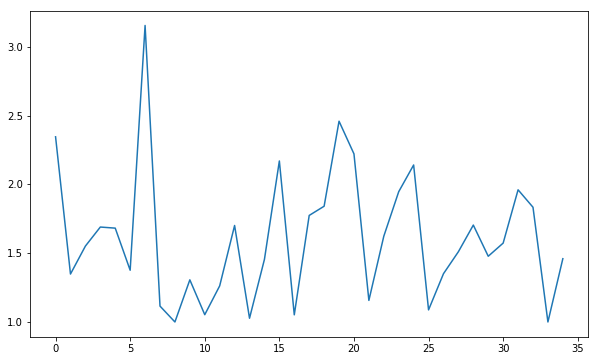

In [30]:
plt.figure(figsize=(10,6))
plt.plot(BL_per_sector)